<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install matplotlib-venn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 126.3 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 106.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 93.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 99.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 113.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 15.2 MB/s eta 0:00:00
   ━━

### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [84]:
from IPython.display import HTML, display
def create_html_display(stats, selected_columns=None):
    """
    Creates HTML display for specified columns with enhanced styling
    #f5f5f5;
    """
    html_content = """
    <style>
        .stats-grid {
            display: grid;
            grid-template-columns: repeat(4, 1fr);
            gap: 20px;
            padding: 20px;
        }
        .stat-card {
            border: 1px solid #e0e0e0;
            border-radius: 8px;
            padding: 15px;
            background-color: gray
            transition: transform 0.2s;
        }
        .stat-card:hover {
            transform: scale(1.02);
            background-color: #e8eaf6;
        }
        .stat-card h3 {
            color: #1976D2;
            margin-top: 0;
            border-bottom: 2px solid #1976D2;
            padding-bottom: 5px;
        }
        .stat-value {
            color: #2e7d32;
            font-weight: bold;
        }
    </style>
    """
    
    # Filter columns if specified
    if selected_columns:
        numeric_cols = {k: v for k, v in stats['numeric'].items() if k in selected_columns}
        categorical_cols = {k: v for k, v in stats['categorical'].items() if k in selected_columns}
    else:
        numeric_cols = stats['numeric']
        categorical_cols = stats['categorical']
    
    # Add numeric columns
    if numeric_cols:
        html_content += "<h2 style='color: #1976D2'>Numeric Columns Statistics</h2><div class='stats-grid'>"
        for col, stat in numeric_cols.items():
            html_content += f"""
            <div class='stat-card'>
                <h3>{col}</h3>
                <ul style='list-style-type: none; padding-left: 0'>
                    <li>Mean: <span class='stat-value'>{stat['mean']:,.2f}</span></li>
                    <li>Non-Zero Mean: <span class='stat-value'>{stat['non_zero_mean']:,.2f}</span></li>
                    <li>Median: <span class='stat-value'>{stat['median']:,.2f}</span></li>
                    <li>Mode: <span class='stat-value'>{stat['mode']:,.2f}</span></li>
                    <li>Zero Values: <span class='stat-value'>{stat['zeros']}</span></li>
                    <li>Missing Values: <span class='stat-value'>{stat['missing']}</span></li>
                    <li>Total Values: <span class='stat-value'>{stat['total']}</span></li>
                </ul>
            </div>
            """
        html_content += "</div>"
    
    # Add categorical columns
    if categorical_cols:
        html_content += "<h2 style='color: #1976D2'>Categorical Columns Statistics</h2><div class='stats-grid'>"
        for col, stat in categorical_cols.items():
            html_content += f"""
            <div class='stat-card'>
                <h3>{col}</h3>
                <ul style='list-style-type: none; padding-left: 0'>
                    <li>Mode: <span class='stat-value'>{stat['mode']}</span></li>
                    <li>Unique: <span class='stat-value'>{stat['unique_values']}</span></li>
                    <li>Missing: <span class='stat-value'>{stat['missing']}</span></li>
                    <li>Total: <span class='stat-value'>{stat['total']}</span></li>
                </ul>
            </div>
            """
        html_content += "</div>"
    
    return html_content

In [85]:
def handle_missing_by_type(df, demographic_cols, compensation_cols):
    """
    Handles missing values with column parameters
    """
    df_clean = df.copy()
    stats = {'numeric': {}, 'object': {}}
    
    html_content = """
    <style>
        .stats-container {
            margin: 20px;
            font-family: Arial, sans-serif;
        }
        .stats-card {
            background-color: black;
            border-radius: 8px;
            padding: 15px;
            margin: 10px 0;
            box-shadow: 0 2px 4px rgba(0,0,0,0.1);
        }
        .value-highlight {
            color: #1976D2;
            font-weight: bold;
        }
        .column-name {
            color: #2e7d32;
            font-weight: bold;
        }
    </style>
    """
    
    # Handle demographic columns
    for column in demographic_cols:
        missing_count = df[column].isna().sum()
        mode_val = df[column].mode()[0]
        df_clean[column] = df_clean[column].fillna(mode_val)
        stats['object'][column] = {
            'missing_count': missing_count,
            'imputed_with': mode_val
        }
    
    # Handle compensation columns
    for column in compensation_cols:
        missing_count = df[column].isna().sum()
        median_val = df[column].median()
        df_clean[column] = df_clean[column].fillna(median_val)
        stats['numeric'][column] = {
            'missing_count': missing_count,
            'imputed_with': median_val
        }
    
    html_content += f"""
    <div class='stats-container'>
        <h2>Missing Value Treatment Summary</h2>
        <div class='stats-card'>
            <h3>Selected Columns:</h3>
            <p>Demographic: <span class='column-name'>{', '.join(demographic_cols)}</span></p>
            <p>Compensation: <span class='column-name'>{', '.join(compensation_cols)}</span></p>
        </div>
    """
    
    # Display numeric stats
    html_content += "<div class='stats-card'><h3>Numeric Columns:</h3>"
    for col, stat in stats['numeric'].items():
        html_content += f"""
        <p><span class='column-name'>{col}</span>: 
           <span class='value-highlight'>{stat['missing_count']}</span> missing values, 
           imputed with <span class='value-highlight'>{stat['imputed_with']:,.2f}</span></p>
        """
    
    # Display categorical stats
    html_content += "</div><div class='stats-card'><h3>Categorical Columns:</h3>"
    for col, stat in stats['object'].items():
        html_content += f"""
        <p><span class='column-name'>{col}</span>: 
           <span class='value-highlight'>{stat['missing_count']}</span> missing values, 
           imputed with <span class='value-highlight'>{stat['imputed_with']}</span></p>
        """
    html_content += "</div></div>"
    
    display(HTML(html_content))
    return df_clean, stats

In [86]:
def convert_years_code(value):
    if isinstance(value, str):
        if "Less than 1 year" in value:
            return 0  # "Less than 1 year" becomes 0
        elif "More than 50 years" in value:
            return 51  # Arbitrary large number for "More than 50 years"
        else:
            try:
                return float(value)  # Try converting to float for valid numeric strings
            except ValueError:
                return None  # Return None if the value can't be converted
    elif pd.isna(value): return 0.0 #np.nan
    else:
        return value  # Return the value if it's already a number

In [87]:
import string
def clean_column_name(category):
    return category.replace(' ', '_').replace(',', '').translate(str.maketrans('', '', string.punctuation))

def create_advanced_encoding(df, column='Employment'):
    """
    Creates one-hot encoding using split and transform logic
    """
    df_encoded = df.copy()
    
    # Split and clean categories
    df_encoded['Emp'] = df_encoded[column].str.split(';')
    #df_encoded['Emp'] = df_encoded['Emp'].apply(
    #    lambda x: [i.strip().replace(' ', '_').replace(',', '') for i in x]
    #)
    
    # Get unique categories
    unique_categories = set([item for sublist in df_encoded['Emp'] for item in sublist])
    
    # Create one-hot columns
    for category in unique_categories:
        colname=clean_column_name(category)
        df_encoded[f'Employment_{colname}'] = df_encoded[column].apply(
            lambda x: 1 if category in x else 0
        )
    
    # Display results
    html_content = f"""
    <style>
        .encode-container {{
            margin: 20px;
            font-family: Arial, sans-serif;
        }}
        .result-card {{
            background-color: black;
            border-radius: 8px;
            padding: 15px;
            margin: 10px 0;
            box-shadow: 0 2px 4px rgba(0,0,0,0.1);
        }}
        .category-list {{
            columns: 3;
            list-style-type: none;
            padding: 0;
        }}
    </style>
    
    <div class='encode-container'>
        <div class='result-card'>
            <h3>Advanced One-Hot Encoding Results</h3>
            <p>Total Categories Encoded: <b>{len(unique_categories)}</b></p>
            <h4>Generated Columns:</h4>
            <ul class='category-list'>
                {''.join(f"<li>Employment_{clean_column_name(category)}</li>" for category in sorted(unique_categories))}
            </ul>
        </div>
    </div>
    """
    
    display(HTML(html_content))
    return df_encoded, unique_categories

In [88]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [89]:
## Write your code here
stats = {'numeric': {}, 'categorical': {}}
    
    # Handle numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    zero_count = (df[col] == 0).sum()
    non_zero_mean = df[col][df[col] != 0].mean()
    stats['numeric'][col] = {
            'mean': df[col].mean(),
            'non_zero_mean': non_zero_mean,
            'median': df[col].median(),
            'mode': df[col].mode()[0],
            'missing': df[col].isna().sum(),
            'zeros': zero_count,
            'total': len(df[col])
        }
    
    # Handle categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
        stats['categorical'][col] = {
            'mode': df[col].mode()[0],
            'unique_values': df[col].nunique(),
            'missing': df[col].isna().sum(),
            'total': len(df[col])
        }
display(HTML(create_html_display(stats)))

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [90]:
## Write your code here
df['YearsCodePro_int']=df['YearsCodePro'].apply(convert_years_code)

df_clean, mstats=handle_missing_by_type(df,['Employment'],['YearsCodePro_int','JobSat'])

### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [91]:
encoded_df, categories = create_advanced_encoding(df)
#cols=['Employment_Employedfulltime','Employment_Employedparttime','Employment_Studentfulltime','Employment_Studentparttime','Employment_Retired']
employment_columns = encoded_df.filter(regex='^Employment_')
#print(employment_columns)

In [92]:
## Write your code here



def analyze_key_columns(df,key_columns):
    """
    Analyzes distribution of key columns with value counts and visualizations
    """
    #print(key_columns)
    
    # Calculate value counts for each column
    value_counts = {
        col: df[col].value_counts().sort_index() 
        for col in key_columns
    }
    
 
    # Display statistical summary
    html_content = """
    <style>
        .distribution-container {
            margin: 20px;
            font-family: Arial, sans-serif;
        }
        .value-table {
            width: 100%;
            border-collapse: collapse;
            margin: 15px 0;
            box-shadow: 0 2px 4px rgba(0,0,0,0.1);
        }
        .value-table th {
            background-color: #1976D2;
            color: white;
            padding: 12px;
            text-align: left;
        }
        .value-table td {
            padding: 10px;
            border-bottom: 1px solid #ddd;
        }
    </style>
    """
    
    for col, counts in value_counts.items():
        html_content += f"""
        <div class='distribution-container'>
            <h3>{col} Distribution</h3>
            {counts.to_frame().to_html(classes='value-table')}
        </div>
        """
    
    display(HTML(html_content))
    return value_counts

# Execute analysis
#key_columns = ['Employment', 'JobSat', 'YearsCodePro_int']

# Insert the two new columns
#print(employment_columns)
try:
    employment_columns.insert(0, 'JobSat', df['JobSat'])
    employment_columns.insert(1, 'YearsCodePro_int', df['YearsCodePro_int'])
except Exception as e:
    pass


distribution_stats = analyze_key_columns(encoded_df,employment_columns)


,count
JobSat,
0.0,311
1.0,276
2.0,772
3.0,1165
4.0,1130
5.0,1956
6.0,3751
7.0,6379
8.0,7509


11


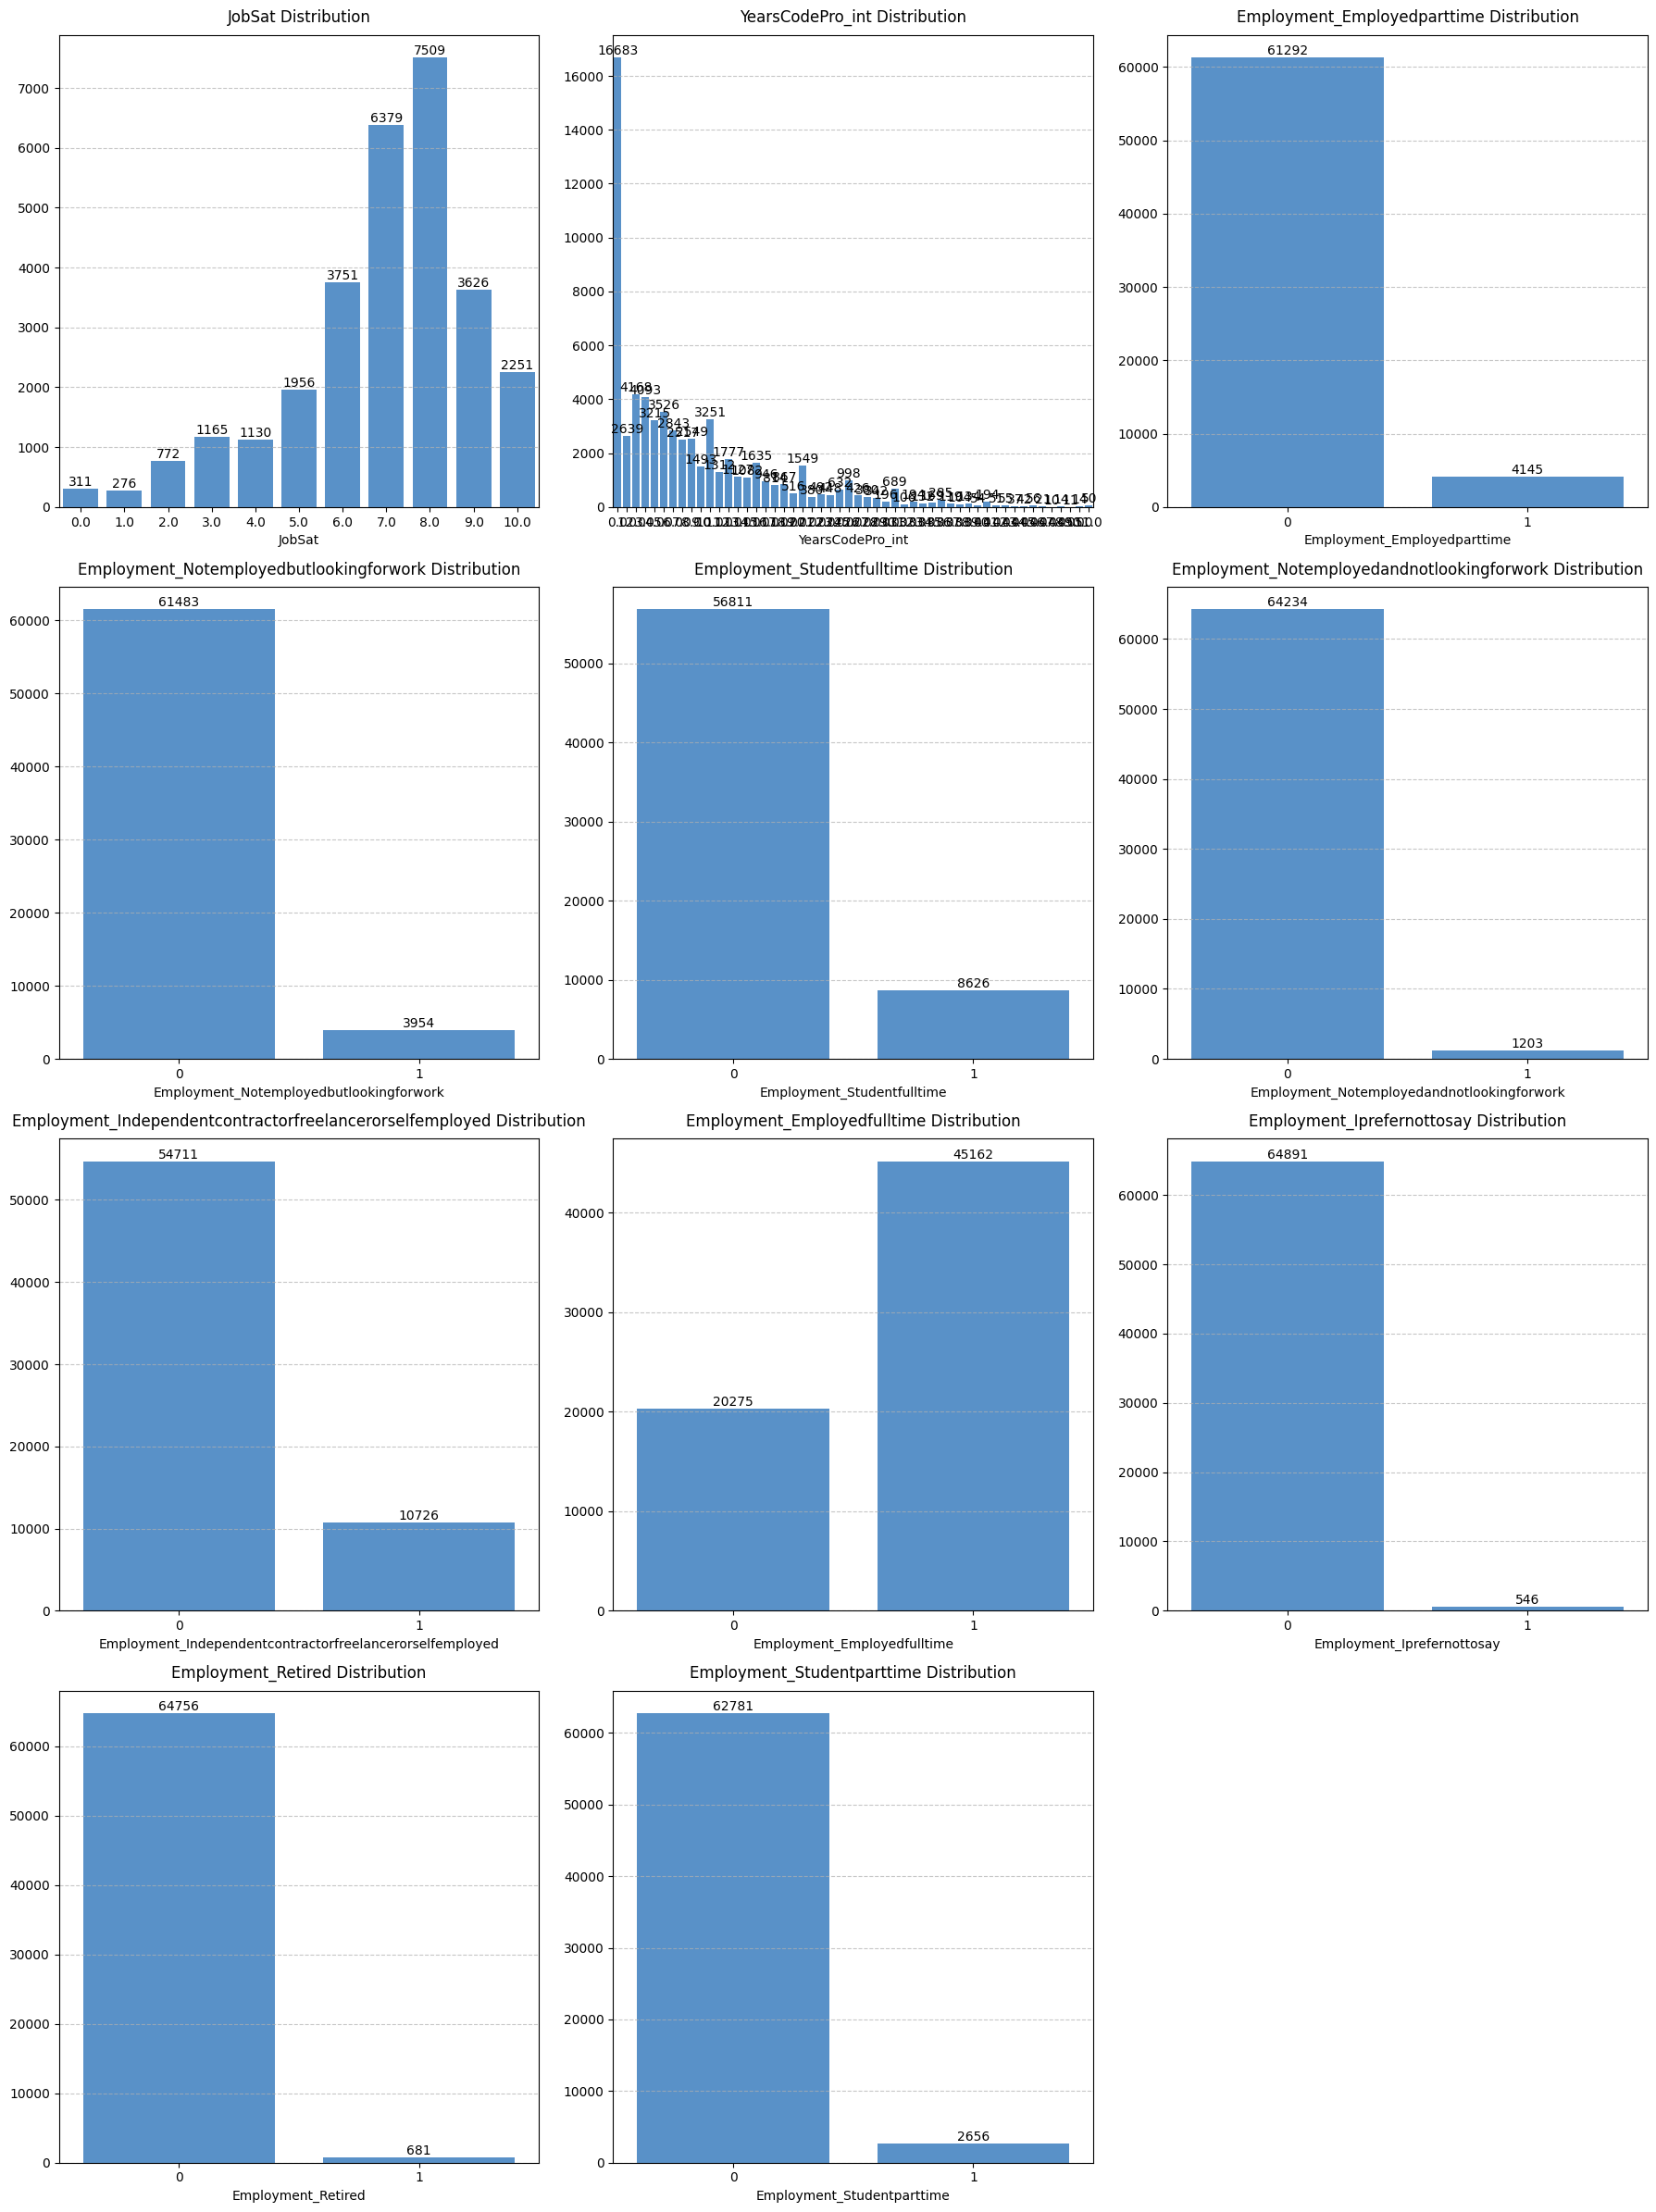

In [93]:
# Create visualizations
num_cols = employment_columns.shape[1]
print(num_cols)
num_rows = (num_cols + 2) // 3  # Calculate number of rows needed
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6*num_rows))
axes = axes.flatten()  # Flatten for easier indexing
for idx, (col, counts) in enumerate(distribution_stats.items()):
        sns.barplot(
            x=counts.index,
            y=counts.values,
            ax=axes[idx],
            color='#1976D2',
            alpha=0.8
        )
        axes[idx].set_title(f'{col} Distribution', pad=10)
        #axes[idx].tick_params(axis='x', rotation=45, ha='right')
        axes[idx].grid(axis='y', linestyle='--', alpha=0.7)
        
        # Add value labels on top of bars
        for i, v in enumerate(counts.values):
            axes[idx].text(i, v, str(int(v)), ha='center', va='bottom')
    
# Hide empty subplots if any
for idx in range(len(distribution_stats), len(axes)):
    axes[idx].set_visible(False)
    
plt.tight_layout()
plt.show()

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


In [94]:
## Write your code here
def visualize_job_satisfaction(df):
    """
    Creates comprehensive visualization of job satisfaction distribution
    """

    
    # Statistical summary
    html_content = f"""
    <style>
        .stats-container {{
            margin: 20px;
            font-family: Arial, sans-serif;
            padding: 15px;
            background-color: black;
            border-radius: 8px;
            box-shadow: 0 2px 4px rgba(0,0,0,0.1);
        }}
        .highlight {{
            color: #1976D2;
            font-weight: bold;
        }}
    </style>
    
    <div class='stats-container'>
        <h3>Job Satisfaction Insights</h3>
        <p>Median Satisfaction: <span class='highlight'>{df['JobSat'].median()}</span></p>
        <p>Most Common Response: <span class='highlight'>{df['JobSat'].mode()[0]}</span></p>
        <p>Total Responses: <span class='highlight'>{len(df):,}</span></p>
    </div>
    """
    
    display(HTML(html_content))
    return None

# Execute visualization
visualize_job_satisfaction(df)

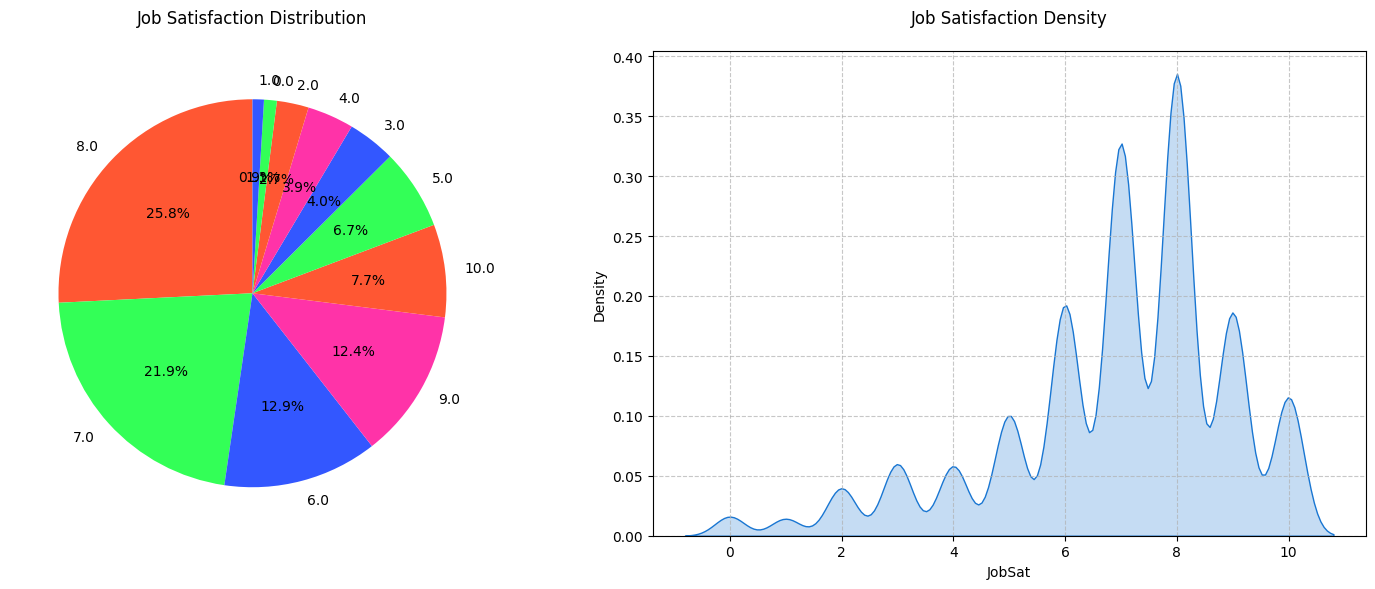

In [95]:
# Create figure with subplots for both pie and KDE
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
# Pie Chart
satisfaction_counts = df['JobSat'].value_counts()
custom_palette = ['#FF5733', '#33FF57', '#3357FF', '#FF33A8']
colors = sns.color_palette(custom_palette)
    
ax1.pie(
        satisfaction_counts,
        labels=satisfaction_counts.index,
        autopct='%1.1f%%',
        colors=colors,
        startangle=90
    )
ax1.set_title('Job Satisfaction Distribution', pad=20)
    
# KDE Plot
sns.kdeplot(
        data=df,
        x='JobSat',
        fill=True,
        color='#1976D2',
        ax=ax2
    )
ax2.set_title('Job Satisfaction Density', pad=20)
ax2.grid(True, linestyle='--', alpha=0.7)
    
plt.tight_layout()
plt.show()

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


In [96]:
 # Calculate frequencies
worked_with = df['LanguageHaveWorkedWith'].str.split(';').explode().value_counts()
want_to_work = df['LanguageWantToWorkWith'].str.split(';').explode().value_counts()
    
# Create comparison DataFrame
comparison_df = pd.DataFrame({
        'Have Worked With': worked_with,
        'Want to Work With': want_to_work
    }).fillna(0)
    
    # Calculate percentage of total developers
total_devs = len(df)
comparison_df['Work %'] = (comparison_df['Have Worked With'] / total_devs * 100).round(2)
comparison_df['Want %'] = (comparison_df['Want to Work With'] / total_devs * 100).round(2)
#print(comparison_df)
# Find matching rows where 'Have Worked With' == 'Want to Work With'
#matching_rows = comparison_df[comparison_df[comparison_df['Have Worked With'] > 0]['Work %'] == comparison_df[comparison_df['Want to Work With'] > 0]['Want %']]

# Count the total number of such matching rows
#matching_count = matching_rows.shape[0]
#matching_count
#matching_rows


Common Usage Percentages:
{0.74, 1.44, 1.05}


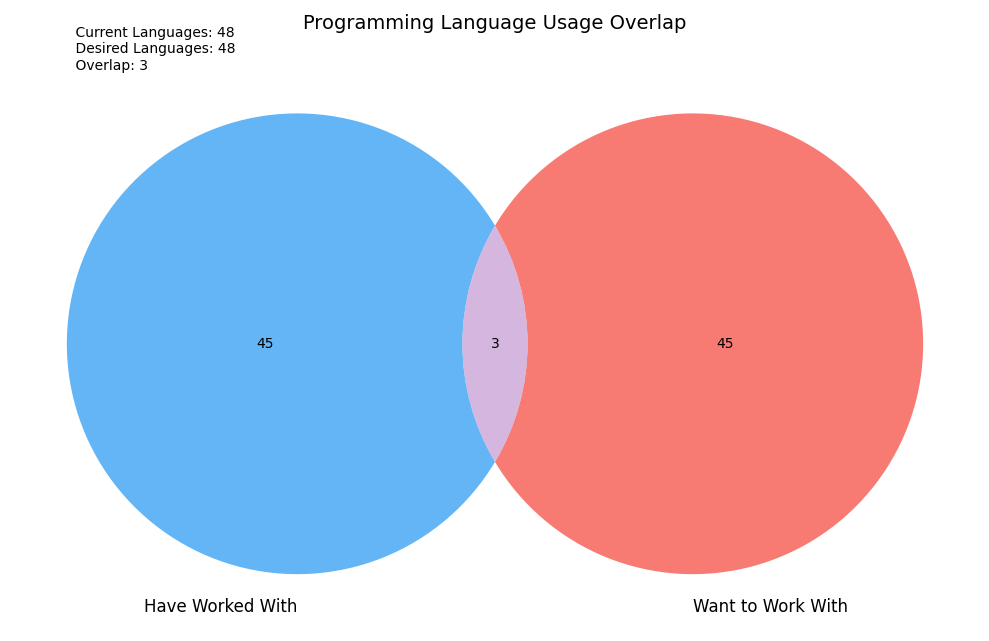

In [97]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
def analyze_language_overlap(comparison_df):
    """
    Creates Venn diagram showing overlap between current and desired programming languages
    """
    # Get sets of languages based on usage percentages
    set_worked_with = set(comparison_df[comparison_df['Have Worked With'] > 0]['Work %'])
    set_want_to_work_with = set(comparison_df[comparison_df['Want to Work With'] > 0]['Want %'])
    
    # Display top languages
    print("\nCommon Usage Percentages:")
    print(set_worked_with & set_want_to_work_with)
    
    # Create enhanced Venn diagram
    plt.figure(figsize=(10, 8))
    v = venn2([set_worked_with, set_want_to_work_with],
              set_labels=('Have Worked With', 'Want to Work With'),
              set_colors=('#2196F3', '#F44336'),
              alpha=0.7)
    
    # Customize appearance
    plt.title("Programming Language Usage Overlap", 
             fontsize=14, 
             pad=20)
    
    # Add statistics
    stats_text = f"""
    Current Languages: {len(set_worked_with)}
    Desired Languages: {len(set_want_to_work_with)}
    Overlap: {len(set_worked_with & set_want_to_work_with)}
    """
    
    plt.annotate(stats_text,
                xy=(0.05, 0.95),
                xycoords='axes fraction',
                bbox=dict(facecolor='white',
                         alpha=0.8,
                         edgecolor='none'))
    
    plt.tight_layout()
    return plt

# Execute analysis
venn_plot = analyze_language_overlap(comparison_df)
venn_plot.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


In [98]:
## Write your code here
def analyze_remote_work_trends(df):
    """
    Analyzes remote work preferences across job roles
    """
    # Create cross-tabulation with percentage
    cross_tab = pd.crosstab(
        df['Country'], 
        df['RemoteWork'], 
        margins=True,           # Add totals
        margins_name="Total"    # Label for the totals row and column
        #,normalize='index'
    ) #* 100
    
    # Prepare the HTML table to display
    table_html = cross_tab.round(2).to_html(classes='result-table')
    
    # Create the HTML content
    html_content = f"""
    <style>
        .analysis-container {{
            margin: 20px;
            font-family: Arial, sans-serif;
        }}
        .result-table {{
            width: 100%;
            border-collapse: collapse;
            margin: 15px 0;
            box-shadow: 0 2px 4px rgba(0,0,0,0.1);
        }}
        .result-table th {{
            background-color: #1976D2;
            color: white;
            padding: 12px;
            text-align: left;
        }}
        .result-table td {{
            padding: 10px;
            border-bottom: 1px solid #ddd;
        }}
        .highlight {{
            font-weight: bold;
            color: #2e7d32;
        }}
    </style>
    
    <div class='analysis-container'>
        <h3>Remote Work Preferences by Employment Type (%)</h3>
        {table_html}
    </div>
    """
    
    # Display HTML content
    display(HTML(html_content))
    
    return cross_tab
remote_work_stats = analyze_remote_work_trends(df)

RemoteWork,"Hybrid (some remote, some in-person)",In-person,Remote,Total
Country,,,,
Afghanistan,17,13,10,40
Albania,14,10,14,38
Algeria,19,8,22,49
Andorra,1,5,4,10
Angola,4,6,5,15
Antigua and Barbuda,2,0,1,3
Argentina,74,33,194,301
Armenia,21,12,20,53
Australia,542,163,330,1035


/tmp/ipykernel_87/956759647.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Remote Work Type', bbox_to_anchor=(1.05, 1))


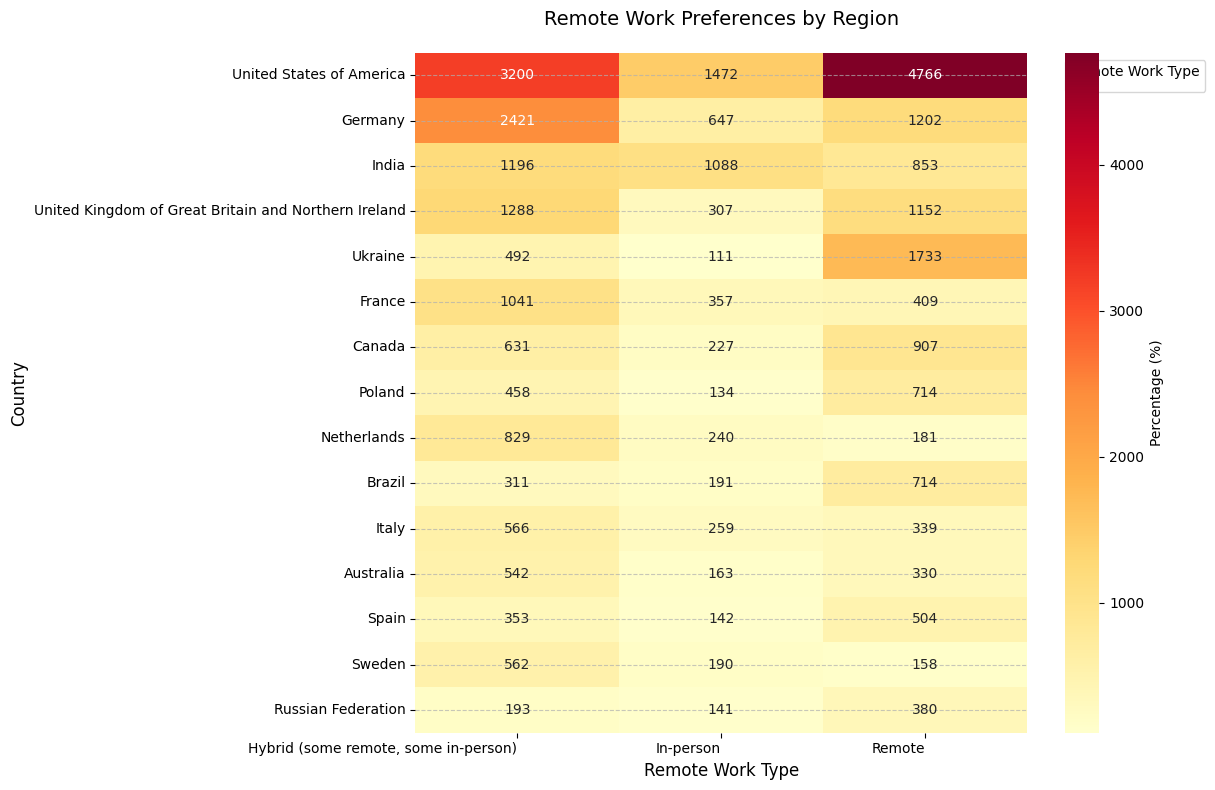

In [99]:
top_countries = df['Country'].value_counts(ascending=False).head(15).index
remote_dist = remote_work_stats.loc[top_countries]
# Create heatmap data
heatmap_data = pd.DataFrame(remote_dist).fillna(0)
    
    # Visualize with heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
        heatmap_data.iloc[:, :-1],
        cmap='YlOrRd',
        annot=True,
        fmt='.0f',
        cbar_kws={'label': 'Percentage (%)'}
    )
plt.title('Remote Work Distribution by Region', pad=20, fontsize=14)
plt.xlabel('Remote Work Type', fontsize=12)
plt.ylabel('Country', fontsize=12)
    
plt.title('Remote Work Preferences by Region', pad=20, fontsize=14)
plt.legend(title='Remote Work Type', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0, ha='right')
    
plt.tight_layout()
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [108]:
## Write your code here
def analyze_experience_satisfaction_correlation(df,mtd='pearson'):
    """
    Visualizes correlation between years of experience and job satisfaction
    """
    # Calculate correlation coefficient
    correlation = df['YearsCodePro_int'].corr(df['JobSat'], method=mtd)
    
    # Display statistical summary
    html_content = f"""
    <style>
        .stats-container {{
            margin: 20px;
            font-family: Arial, sans-serif;
            padding: 15px;
            background-color: black;
            border-radius: 8px;
            box-shadow: 0 2px 4px rgba(0,0,0,0.1);
        }}
        .highlight {{
            color: #1976D2;
            font-weight: bold;
        }}
    </style>
    
    <div class='stats-container'>
        <h3>Experience-Satisfaction Analysis with <span class='highlight'>{mtd} </span>method</h3>
        <p>Correlation Coefficient: <span class='highlight'>{correlation:.3f}</span></p>
        <p>Number of Observations: <span class='highlight'>{len(df):,}</span></p>
    </div>
    """
    
    display(HTML(html_content))
    return correlation

# Execute analysis
correlation_stat = analyze_experience_satisfaction_correlation(df,'pearson')
correlation_stat = analyze_experience_satisfaction_correlation(df,'spearman')

### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


/tmp/ipykernel_87/4067087694.py:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1500x800 with 0 Axes>

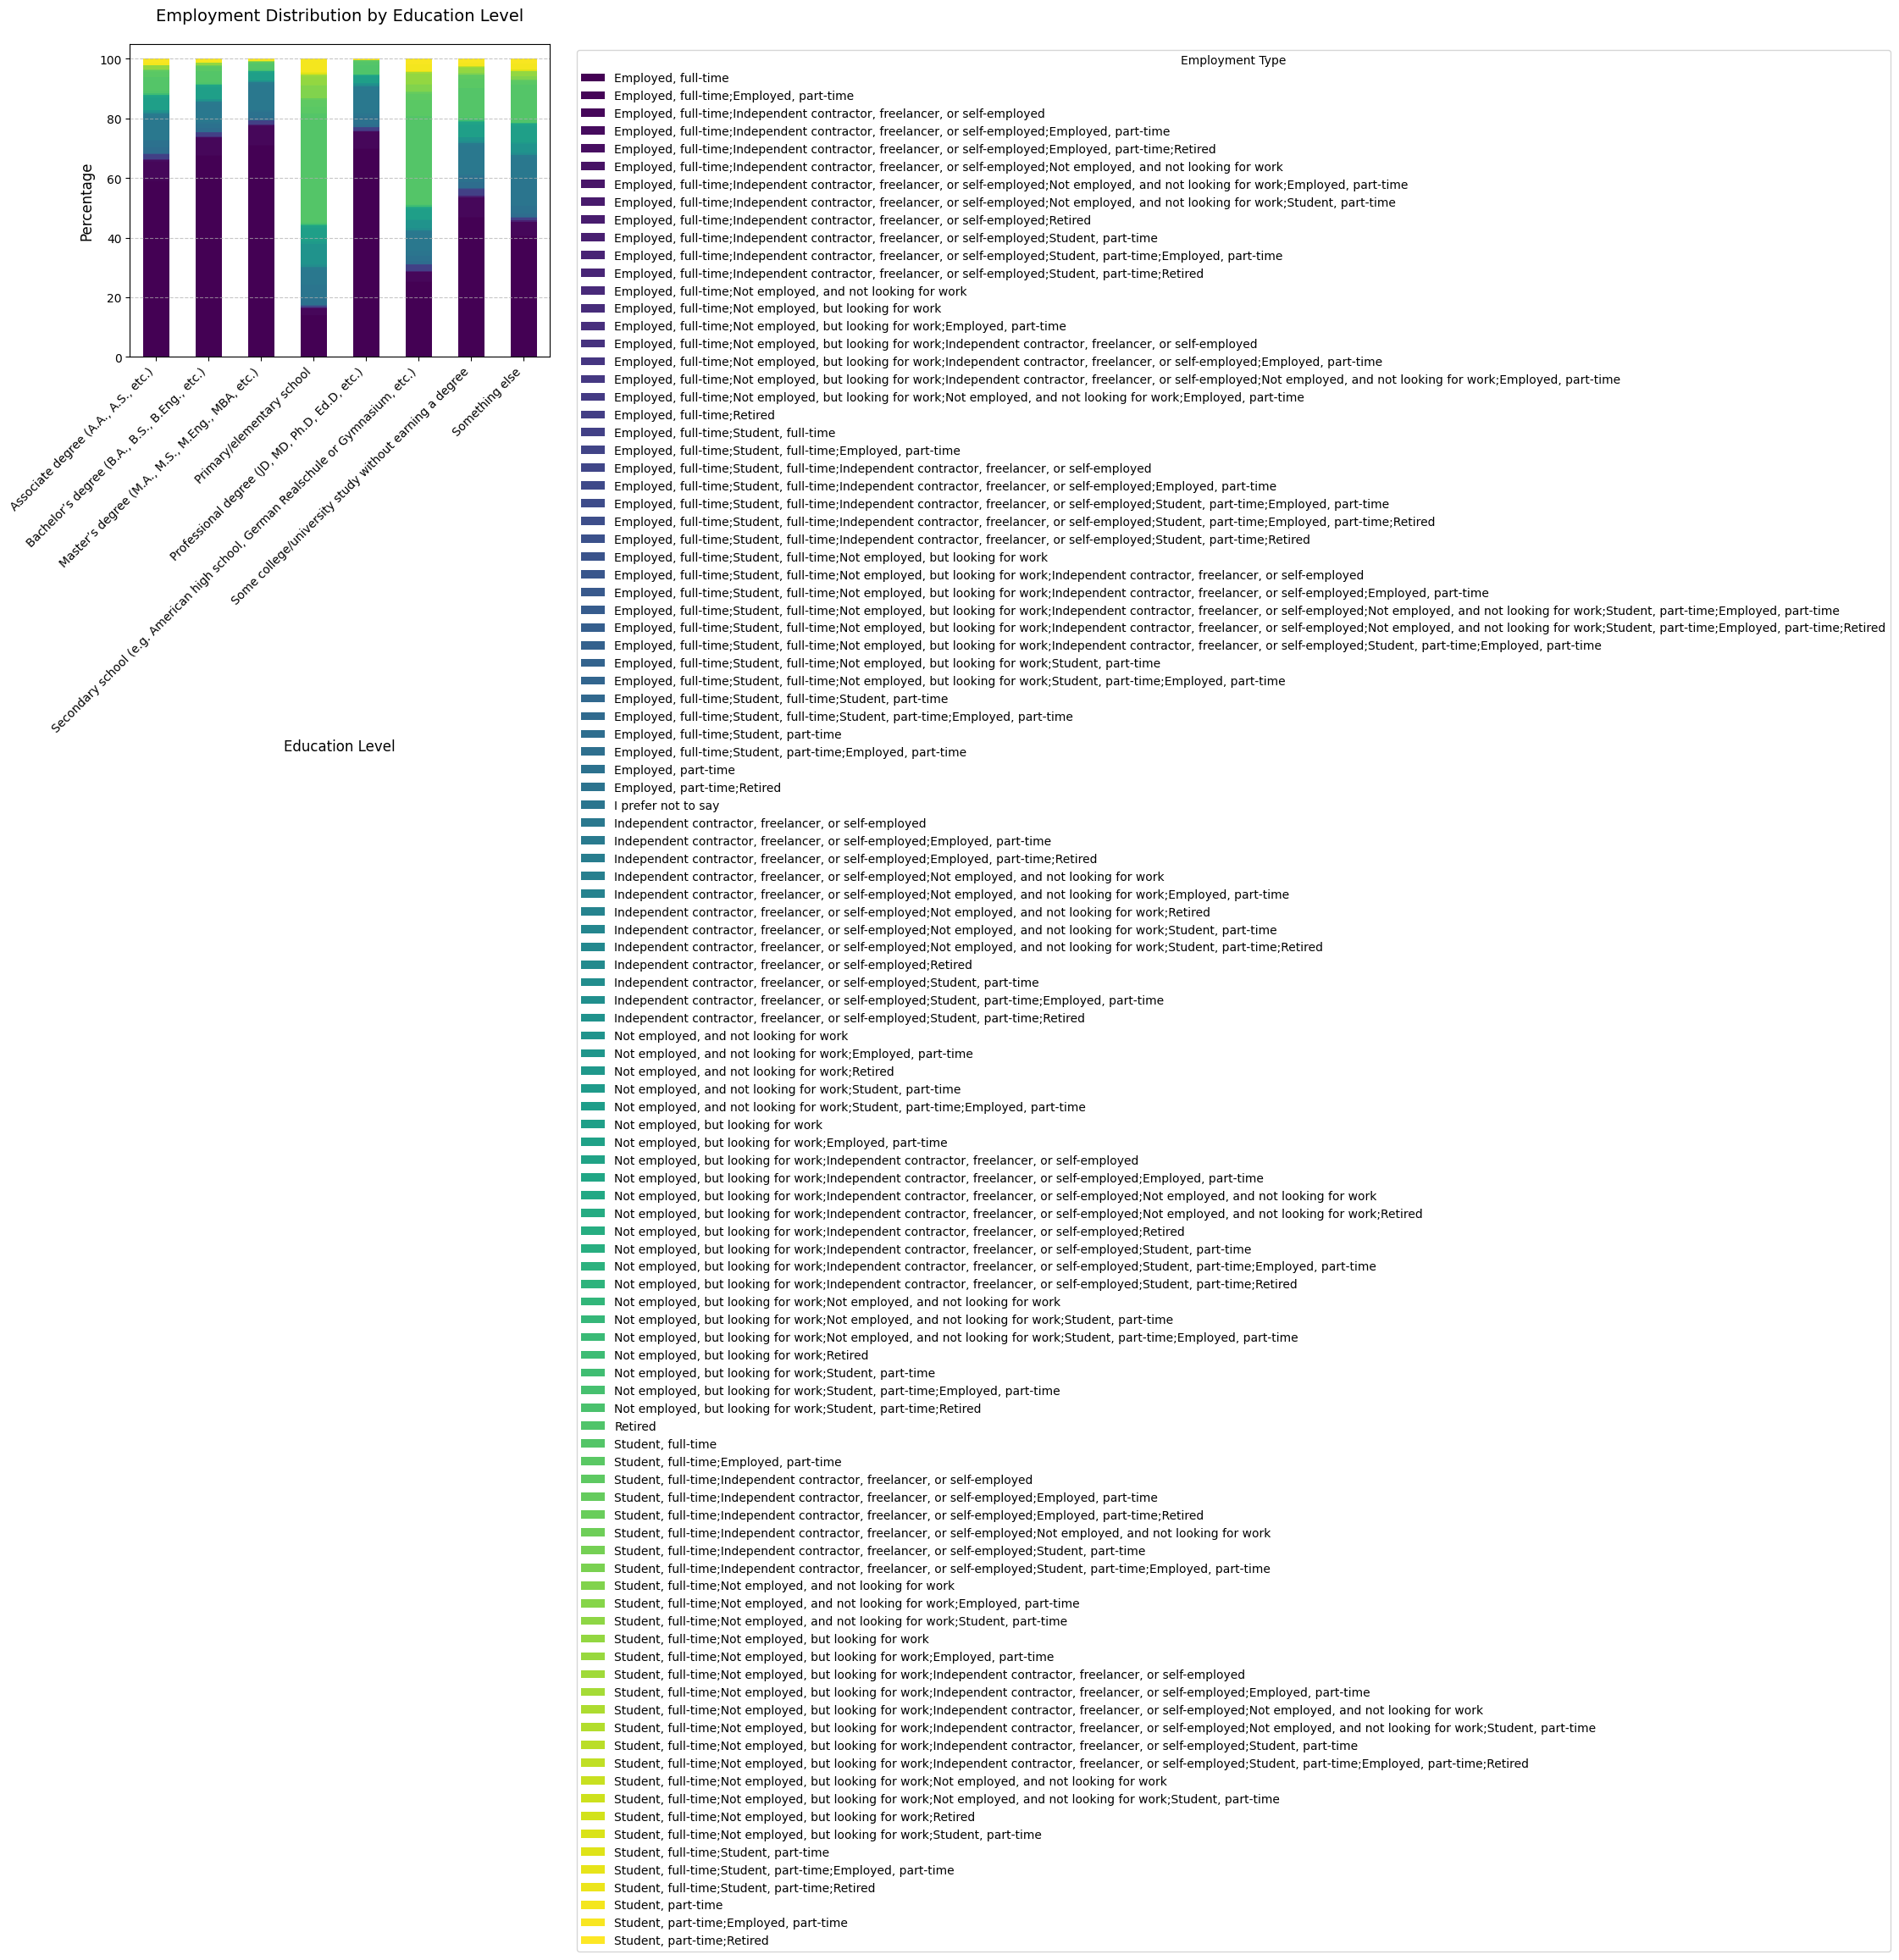

In [109]:
## Write your code here
# Visualization
cross_tab = pd.crosstab(
        df['EdLevel'],
        df['Employment'],
        normalize='index'
    ) * 100
plt.figure(figsize=(15, 8))
    
    # Create stacked bar plot
cross_tab.plot(
        kind='bar',
        stacked=True,
        colormap='viridis'
    )
    
plt.title('Employment Distribution by Education Level', pad=20, fontsize=14)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [110]:
## Write your code here
encoded_df.to_csv('gs_lab11_survey_data.csv', index=False)

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
